# **Credit Scoring**

### **Contents**

1. Business Problem Understanding
2. Data Understanding
3. Data Preprocessing
4. Modeling
5. Conclusion
6. Recommendation

****

## **Business Problem Understanding**

**Context**

Dalam industri perbankan, penilaian resiko kredit adalah proses vital untuk menjaga keseimbaangan antara memberikan akses layanan finansial kepada pelanggan dan mengurangi kemungkinan resiko kredit yang timbul dari keterlambatan pembayaran peminjaman. Seiring dengan perkembangan teknologi informasi dan Machine Learning, potensi besar ada untuk meningkatkan akurasi dan efisiensi dalam penilaian resiko kredit. Dengan meningkatnya volume data yang tersedia, metode konvensional sering kali tidak dapat memanfaatkan informasi ini secara efektif. 

**Problem Statement**

Tantangan utama adalah bagaimana meningkatkan proses penilaian resiko kredit di industri perbankan. Pada awalnya, penilaian ini dilakukan secara manual dengan analisis kuantitatif dan kualitatif, namun hal ini terbatas dalam memproses data besar dan kompleks yang tersedia saat ini. Solusi yang muncul adalah pengembangan Model Credit Scoring berbasis Machine Learning yang dapat memanfaatkan algoritma canggih untuk memproses data historis dan mengidentifikasi pola-pola yang memiliki dampak signifikan terhadap penilaian resiko. 

**Goals**

Tujuan dari penelitian ini adalah:

1. Menginvestigasi berbagai algoritma Machine Learning untuk mengembangkan model prediksi resiko kredit yang lebih akurat.
2. Meningkatkan akurasi penilaian resiko kredit dengan memanfaatkan model Machine Learning
3. Memperhitungkan faktor-faktor kritis yang mempengaruhi kemampuan pelanggan untuk membayar pinjaman dalam model.
4. Menghasilkan solusi inovatif dalam penilaian resiko kredit di industri perbankan yang dapat meningkatkan efisiensi dan akurasi proses tersebut

****

## **Data Understanding**

- Dataset merupakan data berasak dari Sistem Layanan Informasi Keuangan.
- Setiap baris data merepresentasikan informasi terkait data pribadi peminjam dan jumlah pinjaman.

**Attribute Information**

| Attribute | Data Type, Length | Description |
| --- | --- | --- |
| X | Long | Unique ID untuk peminjam |
| SLIK_total_limit | Float | Jumlah total limit kredit yang tersedia SLIK |
| SLIK_pembayaran_per_limit | Float | Rasio pembayaran terhadap total limit kredit yang tersedia dalam data SLIK |
| SLIK_tagihan | Float | Jumlah tagihan yag harus dibayarkan oleh peminjam berdasarkan data SLIK |
| pendapatan | Float | Pendapatan peminjam |
| target_default | Int | Target atau label yang menunjukkan apakah peminjam telah mengalami default (tidak membayar) atau tidak |
| umur | Float | Usia peminjam |
| gender | Text | Jenis kelamin peminjam |
| status_rumah | Float | Status kepemilikian rumah peminjam |
| jumlah_tanggungan | Int | Jumlah tanggungan atau anggota keluarga yang menjadi tanggungan peminjam |
| kelas_pekerjaan | Int | Kelas pekerjaan atau jenis pekerjaan peminjam |
| status_tabungan | Text | Status tabungan peminjam |

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from sklearn.preprocessing import LabelEncoder
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode, iplot
from scipy.stats import normaltest

import warnings
warnings.filterwarnings('ignore')

In [3]:
import pandas as pd
import numpy as np

df = pd.read_excel('Credit_Scoring_Dataset.xlsx')
df.head()

,X,SLIK_total_limit,SLIK_pembayaran_per_limit,SLIK_tagihan,pendapatan,target_default,umur,gender,status_rumah,jumlah_tanggungan,kelas_pekerjaan,status_tabungan
0,1,7000000.0,7490000.0,70000.0,6000000.0,0,25.0,F,0.0,2,1,high
1,2,10000000.0,0.0,300000.0,10000000.0,0,23.0,F,0.0,2,1,high
2,3,29000000.0,29580000.0,6960000.0,22000000.0,0,25.0,M,0.0,2,2,moderate
3,4,22000000.0,21780000.0,3740000.0,54000000.0,0,37.0,F,2.0,7,3,little
4,5,10000000.0,11000000.0,9200000.0,20000000.0,0,41.0,F,0.0,3,3,little


In [4]:
df.describe()

,X,SLIK_total_limit,SLIK_pembayaran_per_limit,SLIK_tagihan,pendapatan,target_default,umur,status_rumah,jumlah_tanggungan,kelas_pekerjaan
count,12500.000000,1.249100e+04,1.249900e+04,1.249500e+04,1.249800e+04,12500.000000,12492.000000,12499.000000,12500.000000,12500.000000
mean,6250.500000,2.150268e+07,1.919605e+07,1.222110e+07,2.838598e+07,0.090640,27.200208,0.715737,3.558720,1.682080
std,3608.583517,3.056182e+07,3.958466e+08,2.593114e+07,4.595056e+07,0.287108,10.112862,0.728070,1.705821,0.800361
min,1.000000,3.000000e+06,-1.251600e+09,0.000000e+00,2.000000e+06,0.000000,18.000000,0.000000,0.000000,1.000000
25%,3125.750000,5.000000e+06,0.000000e+00,2.100000e+06,5.000000e+06,0.000000,20.000000,0.000000,2.000000,1.000000
50%,6250.500000,9.000000e+06,2.970000e+06,4.950000e+06,1.100000e+07,0.000000,23.000000,1.000000,3.000000,2.000000
75%,9375.250000,2.300000e+07,1.007000e+07,1.120000e+07,3.100000e+07,0.000000,30.000000,1.000000,5.000000,2.000000
max,12500.000000,1.050000e+09,3.387780e+10,8.452500e+08,1.559000e+09,1.000000,60.000000,3.000000,8.000000,4.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12500 entries, 0 to 12499
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   X                          12500 non-null  int64  
 1   SLIK_total_limit           12491 non-null  float64
 2   SLIK_pembayaran_per_limit  12499 non-null  float64
 3   SLIK_tagihan               12495 non-null  float64
 4   pendapatan                 12498 non-null  float64
 5   target_default             12500 non-null  int64  
 6   umur                       12492 non-null  float64
 7   gender                     12491 non-null  object 
 8   status_rumah               12499 non-null  float64
 9   jumlah_tanggungan          12500 non-null  int64  
 10  kelas_pekerjaan            12500 non-null  int64  
 11  status_tabungan            12478 non-null  object 
dtypes: float64(6), int64(4), object(2)
memory usage: 1.1+ MB


# **Data Preprocessing**

In [6]:
# Check duplicated data
df.duplicated().sum()

0

In [7]:
# Check Kolom Missing Values
def missing_values():

    # Mengatur opsi untuk menampilkan seluruh isi kolom
    pd.set_option('display.max_colwidth', 1)

    # Membuat list kosong untuk menyimpan informasi unik tiap kolom
    listItem = []

    # Mengiterasi tiap kolom dalam DataFrame
    for col in df.columns:
        # Memeriksa apakah ada nilai null dalam kolom
        if df[col].isnull().any():
            # Menghitung persentase missing values dengan penanganan khusus jika jumlah count non-null adalah nol
            if df[col].count() == 0:
                missing_percentage = np.nan
            else:
                missing_percentage = round((df[col].isnull().sum() / len(df)) * 100, 2)
        
            # Menambahkan informasi kolom, tipe data, jumlah unik, nilai unik, dan persentase missing values ke dalam list
            listItem.append([col, df[col].dtypes, missing_percentage])

    # Membuat DataFrame dari list yang telah dibuat
    tabelMissingValues = pd.DataFrame(columns=['Column Name', 'Data Types', 'Missing Percentage'],
                          data=listItem)

    # Menampilkan DataFrame
    return tabelMissingValues

missing_values()

,Column Name,Data Types,Missing Percentage
0,SLIK_total_limit,float64,0.07
1,SLIK_pembayaran_per_limit,float64,0.01
2,SLIK_tagihan,float64,0.04
3,pendapatan,float64,0.02
4,umur,float64,0.06
5,gender,object,0.07
6,status_rumah,float64,0.01
7,status_tabungan,object,0.18


Berdasarkan tabel missing values terlihat semua kolom terdapat missing values. Untuk keputusan selanjutnya akan dilakukan dilakukan penghapusan data missing values di setiap kolom

In [8]:
# Menghapus missing values
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)

In [9]:
df.head()

,X,SLIK_total_limit,SLIK_pembayaran_per_limit,SLIK_tagihan,pendapatan,target_default,umur,gender,status_rumah,jumlah_tanggungan,kelas_pekerjaan,status_tabungan
0,1,7000000.0,7490000.0,70000.0,6000000.0,0,25.0,F,0.0,2,1,high
1,2,10000000.0,0.0,300000.0,10000000.0,0,23.0,F,0.0,2,1,high
2,3,29000000.0,29580000.0,6960000.0,22000000.0,0,25.0,M,0.0,2,2,moderate
3,4,22000000.0,21780000.0,3740000.0,54000000.0,0,37.0,F,2.0,7,3,little
4,5,10000000.0,11000000.0,9200000.0,20000000.0,0,41.0,F,0.0,3,3,little


In [10]:
# Tambah kolom 0 --> Non-Default ; 1 --> Default 

# Membuat kolom "Label" dengan nilai default 'Unknown'
df['Label'] = 'Unknown'

# Mengubah nilai 'Label' berdasarkan nilai 'target_default'
df.loc[df['target_default'] == 0, 'Label'] = 'Non-Default'
df.loc[df['target_default'] == 1, 'Label'] = 'Default'

In [11]:
df[df['Label'] == 'Default']

,X,SLIK_total_limit,SLIK_pembayaran_per_limit,SLIK_tagihan,pendapatan,target_default,umur,gender,status_rumah,jumlah_tanggungan,kelas_pekerjaan,status_tabungan,Label
13,14,7000000.0,0.0,7980000.0,9000000.0,1,22.0,F,0.0,3,1,little,Default
18,19,5000000.0,450000.0,5800000.0,11000000.0,1,23.0,F,0.0,2,1,little,Default
23,24,21000000.0,2310000.0,23520000.0,18000000.0,1,19.0,M,0.0,2,1,little,Default
37,38,8000000.0,0.0,80000.0,6000000.0,1,18.0,F,1.0,1,2,high,Default
42,43,6000000.0,2820000.0,6360000.0,15000000.0,1,20.0,F,0.0,2,1,moderate,Default
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12409,12459,4000000.0,3800000.0,4880000.0,5000000.0,1,20.0,F,0.0,4,2,little,Default
12417,12467,13000000.0,0.0,5460000.0,15000000.0,1,21.0,M,0.0,2,3,moderate,Default
12427,12477,69000000.0,0.0,66240000.0,138000000.0,1,19.0,M,1.0,5,1,moderate,Default
12428,12478,5000000.0,0.0,6650000.0,4000000.0,1,23.0,F,0.0,3,1,little,Default


# **Explorasi Data Analysis**

In [12]:
Label = pd.DataFrame(df.groupby('Label').count()['target_default']).reset_index()

In [13]:
import plotly.graph_objects as go

Label = pd.DataFrame(df.groupby('Label').count()['target_default']).reset_index()

# Buat grafik
fig = go.Figure(data=[go.Pie(labels=Label['Label'], values=Label['target_default'], pull=[0,0.2])])

fig.update_layout(
    title={
        'text': "Distribusi Target Default",
        'x': 0.5,                               # Posisi judul horizontal (0-1, 0.5 adalah tengah)
        'y': 0.95,                              # Posisi judul vertikal (0-1, 0.95 adalah tinggi)
        'xanchor': 'center',                    # Ancoran horizontal (center, left, atau right)
        'yanchor': 'top',                       # Ancoran vertikal (top, middle, atau bottom)
        'font': {'size': 24}                    # Ukuran font judul
    },
    width=800,      # Lebar grafik dalam piksel
    height=600,     # Tinggi grafik dalam piksel
)

fig.show()

Text(0.5, 1.0, 'Distribution Plot of Pendapatan')

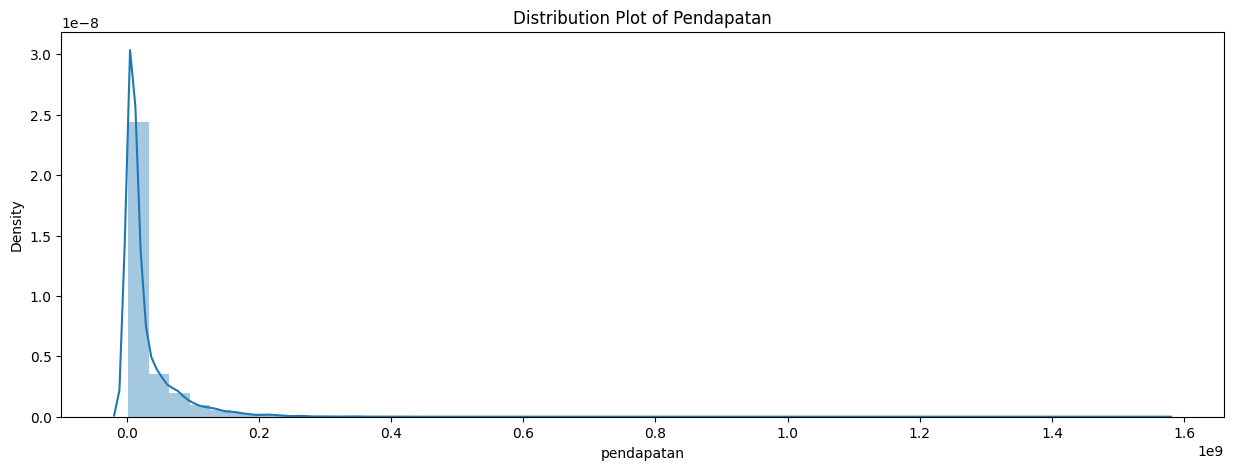

In [14]:
fig, ax = plt.subplots(figsize=(15,5))
sns.distplot(df['pendapatan'].dropna(), ax=ax).set_title('Distribution Plot of Pendapatan')

In [15]:
df[df['pendapatan'] < 1000000000]['pendapatan']

0        6000000.0  
1        10000000.0 
2        22000000.0 
3        54000000.0 
4        20000000.0 
            ...     
12446    12000000.0 
12447    4000000.0  
12448    4000000.0  
12449    4000000.0  
12450    229000000.0
Name: pendapatan, Length: 12450, dtype: float64

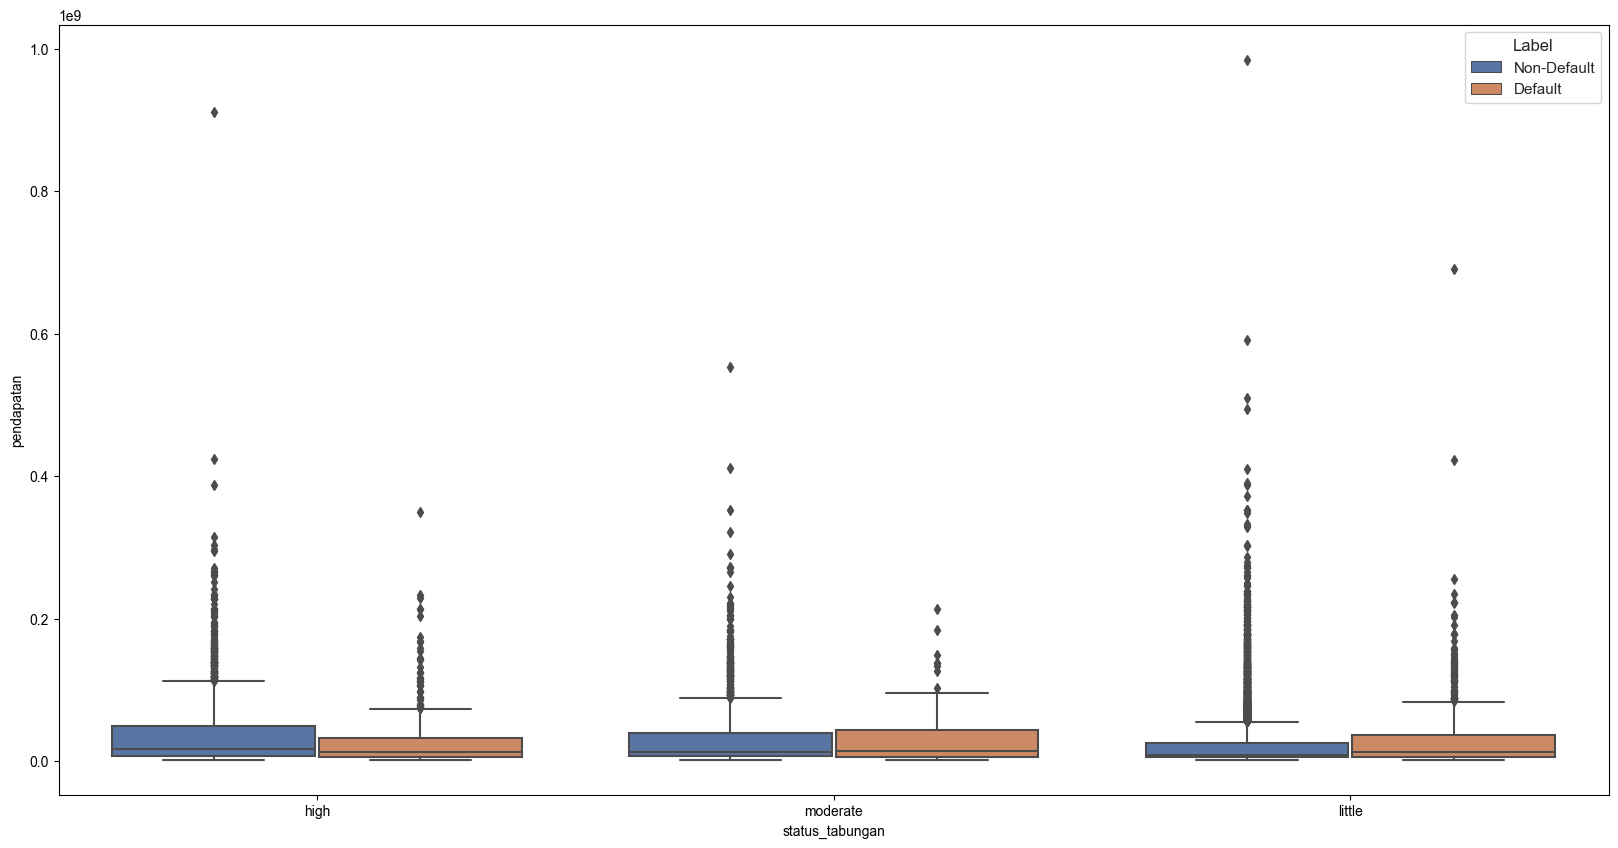

In [16]:
# Variasi box plot dengan menggunakan dua variabel
# Cobalah kombinasi lainnya
fig, ax = plt.subplots(figsize=(20,10))
sns.set(style="whitegrid")
ax = sns.boxplot(y=df[df['pendapatan'] < 1000000000]['pendapatan'],x = df['status_tabungan'], hue = df['Label'])

In [17]:
df[df['status_tabungan'] == 'little']['SLIK_tagihan'].describe()

count    8.087000e+03
mean     1.563881e+07
std      2.864667e+07
min      2.000000e+05
25%      3.600000e+06
50%      6.450000e+06
75%      1.597000e+07
max      8.452500e+08
Name: SLIK_tagihan, dtype: float64

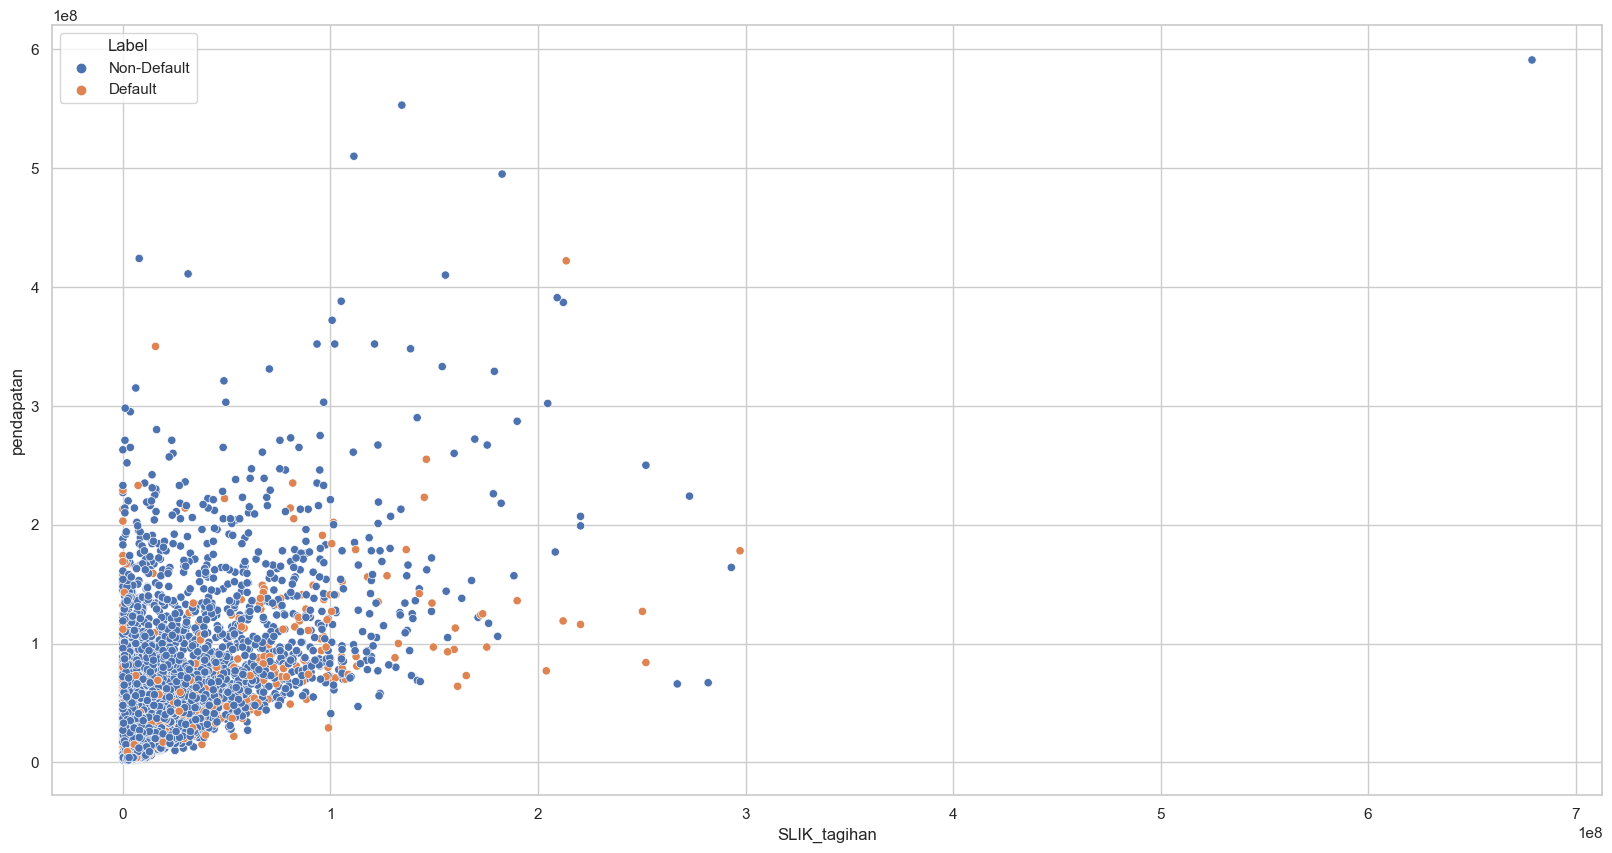

In [18]:
fig, ax = plt.subplots(figsize=(20,10))
ax = sns.scatterplot(x='SLIK_tagihan',y=df[df['pendapatan'] < 600000000]['pendapatan'],hue = 'Label',data=df)

Korelasi dengan **Label Default/Non-Default:** Dengan menganalisis korelasi antara informasi dalam SLIK tagihan dan label "Default" dan "Non-Default," dapat mengidentifikasi variabel SLIK tagihan mana yang paling kuat terkait dengan risiko default. Ini dapat membantu dalam membangun model credit scoring yang lebih akurat.

Dalam konteks scatter plot antara SLIK tagihan dan label **Default** atau **Non-Default** yang dimaksud dengan **korelasi** adalah sejauh mana ada hubungan atau pola yang dapat diamati antara variabel SLIK tagihan (sumbu X) dan apakah seorang peminjam dianggap **Default** atau **Non-Default** (sumbu Y).

Korelasi dalam konteks ini dapat berarti beberapa hal:

**Korelasi Positif:** Secara umum, peminjam yang memiliki **SLIK tagihan yang lebih tinggi** cenderung cenderung diberi label **Non-Default** (tidak default), maka ini adalah **korelasi positif**. Dalam scatter plot, dapat diartikan bahwa **titik-titik data cenderung membentuk pola naik dari kiri bawah ke kanan atas**

**Korelasi Negatif:** Sebaliknya, jika terlihat bahwa peminjam dengan **SLIK tagihan yang lebih rendah** cenderung diberi label **Non-Default** maka ini adalah **korelasi negatif**. Dalam scatter plot, dapat terlihat pola turun dari kiri atas ke kanan bawah.

Berdasarkan grafik diatas:

**SLIK tagihan yang lebih tinggi** mengacu pada nilai SLIK tagihan yang lebih besar atau lebih baik. Ini bisa berarti bahwa:
- peminjam memiliki riwayat pembayaran yang baik
- jarang terlambat pembayaran
- atau memiliki catatan pembayaran yang positif dalam SLIK tagihan mereka.

**Non-Default** mengacu pada status peminjam yang tidak mengalami default. Ini berarti bahwa:
- peminjam-peminjam dengan SLIK tagihan yang lebih tinggi cenderung dapat membayar kembali pinjaman mereka tepat waktu dan tidak mengalami masalah pembayaran.

<Axes: >

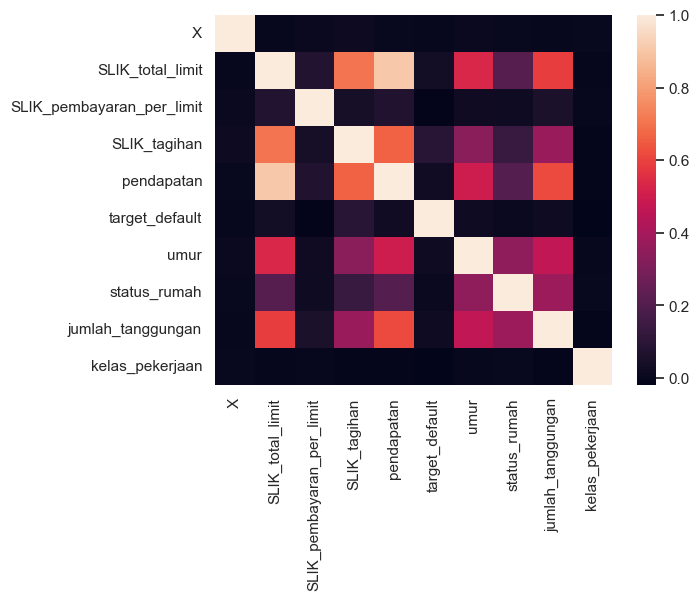

In [19]:
import seaborn as sns
corr = df.corr(numeric_only=True)
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

In [20]:
df.drop('Label', axis=1, inplace=True)

## **Data Preparation**

### **Missing Values**

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12451 entries, 0 to 12450
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   X                          12451 non-null  int64  
 1   SLIK_total_limit           12451 non-null  float64
 2   SLIK_pembayaran_per_limit  12451 non-null  float64
 3   SLIK_tagihan               12451 non-null  float64
 4   pendapatan                 12451 non-null  float64
 5   target_default             12451 non-null  int64  
 6   umur                       12451 non-null  float64
 7   gender                     12451 non-null  object 
 8   status_rumah               12451 non-null  float64
 9   jumlah_tanggungan          12451 non-null  int64  
 10  kelas_pekerjaan            12451 non-null  int64  
 11  status_tabungan            12451 non-null  object 
dtypes: float64(6), int64(4), object(2)
memory usage: 1.1+ MB


In [22]:
df.isnull().sum()

X                            0
SLIK_total_limit             0
SLIK_pembayaran_per_limit    0
SLIK_tagihan                 0
pendapatan                   0
target_default               0
umur                         0
gender                       0
status_rumah                 0
jumlah_tanggungan            0
kelas_pekerjaan              0
status_tabungan              0
dtype: int64

In [23]:
missing_values()

,Column Name,Data Types,Missing Percentage


In [24]:
df.dropna(axis=0, inplace=True)

df.reset_index(drop=True, inplace=True)

In [25]:
df.head()

,X,SLIK_total_limit,SLIK_pembayaran_per_limit,SLIK_tagihan,pendapatan,target_default,umur,gender,status_rumah,jumlah_tanggungan,kelas_pekerjaan,status_tabungan
0,1,7000000.0,7490000.0,70000.0,6000000.0,0,25.0,F,0.0,2,1,high
1,2,10000000.0,0.0,300000.0,10000000.0,0,23.0,F,0.0,2,1,high
2,3,29000000.0,29580000.0,6960000.0,22000000.0,0,25.0,M,0.0,2,2,moderate
3,4,22000000.0,21780000.0,3740000.0,54000000.0,0,37.0,F,2.0,7,3,little
4,5,10000000.0,11000000.0,9200000.0,20000000.0,0,41.0,F,0.0,3,3,little


## **Feature Engineering**

### **1. Rasio Utilitas**

In [26]:
df['rasio_utilitas'] = (df['SLIK_tagihan'] / df['SLIK_total_limit'])*100

In [27]:
df['rasio_utilitas']

0        1.0  
1        3.0  
2        24.0 
3        17.0 
4        92.0 
         ...  
12446    110.0
12447    46.0 
12448    124.0
12449    100.0
12450    78.0 
Name: rasio_utilitas, Length: 12451, dtype: float64

### **2. Rasio Pembayaran**

In [28]:
df['rasio_pembayaran'] = (df['SLIK_pembayaran_per_limit'] / df['SLIK_tagihan'])*100

In [29]:
df['rasio_pembayaran']

0        10700.000000
1        0.000000    
2        425.000000  
3        582.352941  
4        119.565217  
            ...      
12446    0.000000    
12447    223.913043  
12448    91.129032   
12449    136.000000  
12450    0.000000    
Name: rasio_pembayaran, Length: 12451, dtype: float64

In [30]:
df['rasio_pembayaran'].fillna(0, inplace=True)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12451 entries, 0 to 12450
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   X                          12451 non-null  int64  
 1   SLIK_total_limit           12451 non-null  float64
 2   SLIK_pembayaran_per_limit  12451 non-null  float64
 3   SLIK_tagihan               12451 non-null  float64
 4   pendapatan                 12451 non-null  float64
 5   target_default             12451 non-null  int64  
 6   umur                       12451 non-null  float64
 7   gender                     12451 non-null  object 
 8   status_rumah               12451 non-null  float64
 9   jumlah_tanggungan          12451 non-null  int64  
 10  kelas_pekerjaan            12451 non-null  int64  
 11  status_tabungan            12451 non-null  object 
 12  rasio_utilitas             12451 non-null  float64
 13  rasio_pembayaran           12451 non-null  flo

# **Data Preparation**

### **1. Data Encoding**

In [32]:
# encoding
from sklearn.preprocessing import OneHotEncoder
from category_encoders import BinaryEncoder, OrdinalEncoder

# column transformer (menyatukan beberapa tahap preprocesing secara sekaligus)
from sklearn.compose import ColumnTransformer

# mapping untuk ordinal encoder
ordinal_mapping = [
    {'col':'status_tabungan', 'mapping' : {'little': 0, 'moderate':1, 'high':2}}
]

transformer = ColumnTransformer([
    ('OneHot', OneHotEncoder(drop='first'), ['gender', 'kelas_pekerjaan']),
    ('Ordinal', OrdinalEncoder(cols=['status_tabungan'], mapping=ordinal_mapping), ['status_tabungan'])
], remainder='passthrough')

# fit
transformer.fit(df)

# transform
df_encod = transformer.transform(df)

df_encoded = pd.DataFrame(df_encod)

transformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('OneHot', OneHotEncoder(drop='first'),
                                 ['gender', 'kelas_pekerjaan']),
                                ('Ordinal',
                                 OrdinalEncoder(cols=['status_tabungan'],
                                                mapping=[{'col': 'status_tabungan',
                                                          'data_type': dtype('O'),
                                                          'mapping': little      0
moderate    1
high        2
dtype: int64}]),
                                 ['status_tabungan'])])

In [33]:
# Mendapatkan nama kolom setelah preprocessing
column_names = transformer.get_feature_names_out()

# Menampilkan nama kolom
print(column_names)

['OneHot__gender_M' 'OneHot__kelas_pekerjaan_2'
 'OneHot__kelas_pekerjaan_3' 'OneHot__kelas_pekerjaan_4'
 'Ordinal__status_tabungan' 'remainder__X' 'remainder__SLIK_total_limit'
 'remainder__SLIK_pembayaran_per_limit' 'remainder__SLIK_tagihan'
 'remainder__pendapatan' 'remainder__target_default' 'remainder__umur'
 'remainder__status_rumah' 'remainder__jumlah_tanggungan'
 'remainder__rasio_utilitas' 'remainder__rasio_pembayaran']


In [34]:
len(column_names)

16

### **2. Preparation Lanjutan**

In [36]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12451 entries, 0 to 12450
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       12451 non-null  float64
 1   1       12451 non-null  float64
 2   2       12451 non-null  float64
 3   3       12451 non-null  float64
 4   4       12451 non-null  float64
 5   5       12451 non-null  float64
 6   6       12451 non-null  float64
 7   7       12451 non-null  float64
 8   8       12451 non-null  float64
 9   9       12451 non-null  float64
 10  10      12451 non-null  float64
 11  11      12451 non-null  float64
 12  12      12451 non-null  float64
 13  13      12451 non-null  float64
 14  14      12451 non-null  float64
 15  15      12451 non-null  float64
dtypes: float64(16)
memory usage: 1.5 MB


In [37]:
column_names

array(['OneHot__gender_M', 'OneHot__kelas_pekerjaan_2',
       'OneHot__kelas_pekerjaan_3', 'OneHot__kelas_pekerjaan_4',
       'Ordinal__status_tabungan', 'remainder__X',
       'remainder__SLIK_total_limit',
       'remainder__SLIK_pembayaran_per_limit', 'remainder__SLIK_tagihan',
       'remainder__pendapatan', 'remainder__target_default',
       'remainder__umur', 'remainder__status_rumah',
       'remainder__jumlah_tanggungan', 'remainder__rasio_utilitas',
       'remainder__rasio_pembayaran'], dtype=object)

In [38]:
# ini lokasi index
df_encoded[5].head(1)

0    1.0
Name: 5, dtype: float64

In [39]:
# ini lokasi target
df_encoded[10].unique()

array([0., 1.])

In [40]:
# Persiapan sebelum melakukan data preparation lainnya.

# Pada bagian ini kita mempersiapkan dataset kita dengan memastikan tidak ada 
# nilai yang missing ataupun nilai yang aneh (seperti infinity dan missing value)
df_encoded[df_encoded==np.inf]=np.nan
df_encoded.fillna(df_encoded.mean(), inplace=True)

# Jangan lupa juga untuk exclude variabel X yang sebenarnya hanyalah index nasabah saja
df_encoded.drop([5], axis = 1, inplace = True)

df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12451 entries, 0 to 12450
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       12451 non-null  float64
 1   1       12451 non-null  float64
 2   2       12451 non-null  float64
 3   3       12451 non-null  float64
 4   4       12451 non-null  float64
 5   6       12451 non-null  float64
 6   7       12451 non-null  float64
 7   8       12451 non-null  float64
 8   9       12451 non-null  float64
 9   10      12451 non-null  float64
 10  11      12451 non-null  float64
 11  12      12451 non-null  float64
 12  13      12451 non-null  float64
 13  14      12451 non-null  float64
 14  15      12451 non-null  float64
dtypes: float64(15)
memory usage: 1.4 MB


In [41]:
pd.DataFrame(df_encoded)

,0,1,2,3,4,6,7,8,9,10,11,12,13,14,15
0,0.0,0.0,0.0,0.0,2.0,7000000.0,7490000.0,70000.0,6000000.0,0.0,25.0,0.0,2.0,1.0,10700.000000
1,0.0,0.0,0.0,0.0,2.0,10000000.0,0.0,300000.0,10000000.0,0.0,23.0,0.0,2.0,3.0,0.000000
2,1.0,1.0,0.0,0.0,1.0,29000000.0,29580000.0,6960000.0,22000000.0,0.0,25.0,0.0,2.0,24.0,425.000000
3,0.0,0.0,1.0,0.0,0.0,22000000.0,21780000.0,3740000.0,54000000.0,0.0,37.0,2.0,7.0,17.0,582.352941
4,0.0,0.0,1.0,0.0,0.0,10000000.0,11000000.0,9200000.0,20000000.0,0.0,41.0,0.0,3.0,92.0,119.565217
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12446,0.0,0.0,0.0,0.0,0.0,7000000.0,0.0,7700000.0,12000000.0,0.0,22.0,1.0,4.0,110.0,0.000000
12447,0.0,0.0,0.0,0.0,0.0,5000000.0,5150000.0,2300000.0,4000000.0,0.0,23.0,0.0,3.0,46.0,223.913043
12448,1.0,0.0,0.0,0.0,0.0,4000000.0,4520000.0,4960000.0,4000000.0,0.0,25.0,2.0,5.0,124.0,91.129032
12449,0.0,0.0,0.0,0.0,0.0,3000000.0,4080000.0,3000000.0,4000000.0,0.0,18.0,0.0,1.0,100.0,136.000000


### **3. Imbalence Data**

In [43]:
from imblearn.over_sampling import RandomOverSampler, SMOTE

In [44]:
from imblearn.over_sampling import RandomOverSampler, SMOTE

# Menentukan variabel dependent dan independent, diperlukan untuk input function SMOTE

# X sebagai semua variabel independent, input untuk model
X = df_encoded.iloc[:, list(range(0,9)) + list(range(10,15))]

# y sebagai target atau variabel dependent
y = df_encoded.iloc[:, [9]]

# menggunakan function SMOTE untuk melakukan kombinasi oversampling/undersampling

# function SMOTE 
sm = SMOTE(random_state = 42)

# Hasil dari function SMOTE disimpan dalam variabel X dan y
X_imbal,y_imbal = sm.fit_resample(X,y)

In [45]:
# mengecek proporsi target
y_imbal.value_counts() / len(y_imbal)

10 
0.0    0.5
1.0    0.5
Name: count, dtype: float64

In [46]:
# mengecek banyaknya tiap kelas pada y_train
y_imbal.value_counts() 

10 
0.0    11323
1.0    11323
Name: count, dtype: int64

### **4. Scalling**

In [47]:
# define scaler
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Memanggil fungsi MinMax scaler
smote = MinMaxScaler()

# Merubah nilai X menjadi standardisation
X_scale = smote.fit_transform(X_imbal)

### **5. Split Dataset**

In [48]:
from sklearn.model_selection import train_test_split

# Membagi data set menjadi train dan test, dimana proporsi test adalah 0.3 / 30% dari total data set
X_train, X_test, y_train, y_test = train_test_split(X_scale, y_imbal, test_size =0.3)

# Membagi lagi test data set menjadi dua, dimana 15% adalah test dan 15% digunakan sebagai validasi
X_test, X_test_holdup, y_test, y_test_holdup = train_test_split(X_test, y_test, test_size =0.5)

# **Banchmark Model**

In [49]:
from sklearn.linear_model import LogisticRegression  
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import accuracy_score,recall_score
from xgboost import XGBClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix, classification_report, f1_score, precision_score, recall_score, roc_auc_score, roc_curve

from sklearn.pipeline import Pipeline

# cross validation untuk menentukan algoritma terbaik
from sklearn.model_selection import cross_val_score, StratifiedKFold

### **roc_auc**

Tujuan: ROC AUC mengukur kemampuan model untuk **membedakan antara kelas positif dan negatif** dengan memeriksa perbandingan antara True Positive Rate (Sensitivitas) dan False Positive Rate (1-Spesifisitas) pada berbagai nilai ambang batas (threshold).

In [50]:
# classification models
LR = LogisticRegression(random_state=0)
KNN = KNeighborsClassifier()
DTree = DecisionTreeClassifier(random_state=0)
RF = RandomForestClassifier(random_state=0)
SVR = SVC(gamma='auto',random_state=0)
GB = GradientBoostingClassifier(random_state=0)
LightGBM = LGBMClassifier(random_state=0)
XGB = XGBClassifier(random_state=0)

models = [LR, KNN, DTree, RF, SVR, GB, LightGBM, XGB]
mean_score=[]
std_score=[]

for i in models:

    pipe_model = Pipeline([
        ('model', i)
    ])
    
    skfold = StratifiedKFold(n_splits=5)

    cv_score = cross_val_score(
        estimator = pipe_model,
        X = X_train,
        y = y_train,
        cv = skfold,
        scoring = 'roc_auc'
    )

    mean_score.append(cv_score.mean())
    std_score.append(cv_score.std())

pd.DataFrame({'model':['Logistic Regression', 'KNN', 'Decision Tree','Random Forest', 'SVR', 'Gradient Boost', 'LightGBM', 'XGB'],
                       'mean roc_auc':mean_score, 'sdev':std_score}).set_index('model').sort_values(by='mean roc_auc',ascending=False)    

[LightGBM] [Info] Number of positive: 6360, number of negative: 6321
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001448 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3485
[LightGBM] [Info] Number of data points in the train set: 12681, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.501538 -> initscore=0.006151
[LightGBM] [Info] Start training from score 0.006151
[LightGBM] [Info] Number of positive: 6360, number of negative: 6321
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001474 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3490
[LightGBM] [Info] Number of data points in the train set: 12681, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.501538 -> initscore=0.006151
[LightGBM] [Info] Start training from score 0.006151
[LightGBM] [In

,mean roc_auc,sdev
model,,
Random Forest,0.985067,0.000672
LightGBM,0.981882,0.001465
XGB,0.980381,0.002351
Gradient Boost,0.976362,0.000807
KNN,0.927350,0.002997
Decision Tree,0.895268,0.004785
SVR,0.861559,0.005323
Logistic Regression,0.665609,0.007085


Dari score **roc_auc** kita dapat menemukan model mana yang mampu memisahkan **kelas positif** dan **kelas negatif** dengan baik (mendekati 1). Diperoleh top three model:
1. Random Forest
2. LightGBM
3. XGB

Dari ketiga model ini akan dilakukan pemodelan ulang untuk menentukan score akurasi dengan **f1 score**

### **f1**

In [55]:
# classification models
RF = RandomForestClassifier(random_state=0)
LightGBM = LGBMClassifier(random_state=0)
XGB = XGBClassifier(random_state=0)

models = [RF, LightGBM, XGB]
mean_score=[]
std_score=[]

for i in models:

    pipe_model = Pipeline([
        ('model', i)
    ])
    
    skfold = StratifiedKFold(n_splits=5)

    cv_score = cross_val_score(
        estimator = pipe_model,
        X = X_train,
        y = y_train,
        cv = skfold,
        scoring = 'f1'
    )

    mean_score.append(cv_score.mean())
    std_score.append(cv_score.std())

pd.DataFrame({'model':['Random Forest', 'LightGBM', 'XGB'],
                       'mean f1_score':mean_score, 'sdev':std_score}).set_index('model').sort_values(by='mean f1_score',ascending=False)    

[LightGBM] [Info] Number of positive: 6360, number of negative: 6321
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001439 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3485
[LightGBM] [Info] Number of data points in the train set: 12681, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.501538 -> initscore=0.006151
[LightGBM] [Info] Start training from score 0.006151
[LightGBM] [Info] Number of positive: 6360, number of negative: 6321
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001341 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3490
[LightGBM] [Info] Number of data points in the train set: 12681, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.501538 -> initscore=0.006151
[LightGBM] [Info] Start training from score 0.006151
[LightGBM] [In

,mean f1_score,sdev
model,,
LightGBM,0.943497,0.002477
Random Forest,0.943419,0.004540
XGB,0.943417,0.001341


### **XGB**

In [56]:
# XGB Confusion Matrix
model_XGB = XGBClassifier(random_state=0)
model_XGB.fit(X_train, y_train)
y_pred_XGB = model_XGB.predict(X_test)
conf_mat_XGB = confusion_matrix(y_pred_XGB,y_test)
conf_mat_XGB

array([[1689,  163],
       [  39, 1506]], dtype=int64)

In [57]:
print("True Positive : ", conf_mat_XGB[1, 1])
print("True Negative : ", conf_mat_XGB[0, 0])
print("False Positive: ", conf_mat_XGB[0, 1])
print("False Negative: ", conf_mat_XGB[1, 0])

True Positive :  1506
True Negative :  1689
False Positive:  163
False Negative:  39


In [58]:
# Classification Report for XGB Model
print(classification_report(model_XGB.predict(X_test),y_test))

              precision    recall  f1-score   support

           0       0.98      0.91      0.94      1852
           1       0.90      0.97      0.94      1545

    accuracy                           0.94      3397
   macro avg       0.94      0.94      0.94      3397
weighted avg       0.94      0.94      0.94      3397



### **LightGBM**

In [59]:
# LightGBM Confusion Matrix
model_LightGBM = LGBMClassifier(random_state=0)
model_LightGBM.fit(X_train, y_train)
y_pred_LightGBM = model_LightGBM.predict(X_test)
conf_mat_LightGBM = confusion_matrix(y_pred_LightGBM,y_test)
conf_mat_LightGBM

[LightGBM] [Info] Number of positive: 7950, number of negative: 7902
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001897 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3530
[LightGBM] [Info] Number of data points in the train set: 15852, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.501514 -> initscore=0.006056
[LightGBM] [Info] Start training from score 0.006056


array([[1697,  166],
       [  31, 1503]], dtype=int64)

In [60]:
print("True Positive : ", conf_mat_LightGBM[1, 1])
print("True Negative : ", conf_mat_LightGBM[0, 0])
print("False Positive: ", conf_mat_LightGBM[0, 1])
print("False Negative: ", conf_mat_LightGBM[1, 0])

True Positive :  1503
True Negative :  1697
False Positive:  166
False Negative:  31


In [61]:
# Classification Report for LightGBM Model
print(classification_report(model_LightGBM.predict(X_test),y_test))

              precision    recall  f1-score   support

         0.0       0.98      0.91      0.95      1863
         1.0       0.90      0.98      0.94      1534

    accuracy                           0.94      3397
   macro avg       0.94      0.95      0.94      3397
weighted avg       0.95      0.94      0.94      3397



### **Random Forest**

In [62]:
# XGB Confusion Matrix
model_RF = RandomForestClassifier(random_state=0)
model_RF.fit(X_train, y_train)
y_pred_RF = model_RF.predict(X_test)
conf_mat_RF = confusion_matrix(y_pred_RF,y_test)
conf_mat_RF

array([[1672,  144],
       [  56, 1525]], dtype=int64)

In [63]:
print("True Positive : ", conf_mat_RF[1, 1])
print("True Negative : ", conf_mat_RF[0, 0])
print("False Positive: ", conf_mat_RF[0, 1])
print("False Negative: ", conf_mat_RF[1, 0])

True Positive :  1525
True Negative :  1672
False Positive:  144
False Negative:  56


In [64]:
# Classification Report for XGB Model
print(classification_report(model_RF.predict(X_test),y_test))

              precision    recall  f1-score   support

         0.0       0.97      0.92      0.94      1816
         1.0       0.91      0.96      0.94      1581

    accuracy                           0.94      3397
   macro avg       0.94      0.94      0.94      3397
weighted avg       0.94      0.94      0.94      3397



#### **Tujuan:**
1. meminimalisasi **False Negative**. dikarenakan, model memprediksi tidak akan gagal bayar namun kenyataanya peminjam mengalami gagal bayar

In [65]:
before_tuning = pd.DataFrame(
    {'Model' : ['LightGBM', 'Random Forest', 'XGB'],
     'False Negative' : [conf_mat_XGB[1, 0], conf_mat_LightGBM[1, 0], conf_mat_RF[1, 0]],
     'f1 score' : [mean_score[0], mean_score[1], mean_score[2]]
     }
).sort_values(by='False Negative', ascending=True)

before_tuning

,Model,False Negative,f1 score
1,Random Forest,31,0.943497
0,LightGBM,39,0.943419
2,XGB,56,0.943417


#### **Hasil:**

Jika dilihat dari tujuan yang ingin dicapai. berdasarkan benchmarking model **Random Forest** memilki nilai **False Negative** ter-rendah dari top 3 model benchmarking yang terpilih.

#### **Interpretasi memilih model dengan ***False Negative*** terkecil**
1. **Keamanan Tinggi**, Tetapi Potensi Kerugian Finansial: Model dengan FN rendah cenderung lebih aman karena cenderung tidak melewatkan kasus default yang seharusnya diprediksi. Namun, ada potensi kehilangan peluang bisnis, terutama jika pelanggan yang seharusnya dapat membayar pinjaman dianggap sebagai risiko tinggi dan ditolak, padahal sebenarnya mereka mampu membayar.

2. **Rendahnya Volume Peminjam yang Mungkin Default:** Model dengan FN rendah cenderung mengidentifikasi sebagian besar peminjam yang benar-benar tidak akan default. Ini mengurangi risiko kredit, tetapi juga dapat mengurangi potensi pendapatan dari bunga pinjaman.

3. **Pelanggan yang Potensial Tidak Diberikan Akses Keuangan:** Jika model cenderung mengklasifikasikan banyak pelanggan yang seharusnya dapat membayar sebagai risiko tinggi, ini dapat menyebabkan banyak pelanggan kehilangan akses ke produk keuangan, yang dapat membatasi pertumbuhan bisnis.

4. **Ketidakpuasan Pelanggan:** Pelanggan yang seharusnya dapat membayar tetapi ditolak pinjaman karena klasifikasi model dapat merasa tidak puas dan meninggalkan lembaga keuangan tersebut.

## **Hyperparameter Tuning**

Dilakukan pada top 3 model dengan perolehan score roc_auc ter-tinggi:
1. LightGBM
2. XGB
3. Random Forest

Tujuan:
1. memperoleh score f1 score tertinggi
2. meminimalisasi nilai Fale Negative

In [66]:
from sklearn.model_selection import RandomizedSearchCV

### **LightGBM**

In [67]:
from sklearn.model_selection import RandomizedSearchCV

# Definisikan model
lgb_model = LGBMClassifier(random_state=0)

# Definisikan parameter grid
param_grid = {
    'colsample_bytree': [0.5, 0.7, 0.9],
    'feature_fraction': [0.5, 0.7, 0.9],
    'learning_rate': [0.01, 0.05, 0.10],
    'max_depth': [6, 10, 20],
    'n_estimators': [500, 1000, 1500]
}

# Inisialisasi RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=lgb_model,
    param_distributions=param_grid,
    n_iter=10,  # Jumlah iterasi pencarian
    scoring='f1',  # Metrik evaluasi
    cv=5,  # Jumlah lipatan validasi silang
    random_state=42,
    verbose=1,
    n_jobs=-1  # Gunakan semua core CPU yang tersedia
)

# Melakukan pencarian pada data pelatihan
random_search.fit(X_train, y_train)

# Menampilkan parameter terbaik yang ditemukan
print("Best Parameters:", random_search.best_params_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=0.5 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=0.5 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 7950, number of negative: 7902
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000508 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3530
[LightGBM] [Info] Number of data points in the train set: 15852, number of used features: 14
[Light

In [68]:
# Model Gradient Boost
model = {'LightGBM': LGBMClassifier(random_state=0)}

# Mendapatkan model dengan parameter terbaik
best_lgbm_model = random_search.best_estimator_

# Fitting model
best_lgbm_model.fit(X_train, y_train)

# Predict test set
y_pred_lgbm_tuning = random_search.predict(X_test)

# Menghitung f1_score
f1_score_lgbm_tuning = f1_score(y_test, y_pred_lgbm_tuning)

print("F1 Score LightGBM setelah tuning:", f1_score_lgbm_tuning)

[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=0.5 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=0.5 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 7950, number of negative: 7902
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000486 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3530
[LightGBM] [Info] Number of data points in the train set: 15852, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.501514 -> initsco

In [69]:
print(best_lgbm_model)

LGBMClassifier(colsample_bytree=0.5, feature_fraction=0.5, learning_rate=0.05,
               max_depth=6, n_estimators=500, random_state=0)


In [70]:
# LightGBM: 
lgb_model = LGBMClassifier(random_state=42)
# Model Tuning
lgbm_params = {'colsample_bytree': 0.9,
 'learning_rate': 0.5,
 'max_depth': 10,
 'n_estimators': 1000}

lgbm_deploy = LGBMClassifier(**lgbm_params).fit(X_test, y_test)

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 1669, number of negative: 1728
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000542 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3261
[LightGBM] [Info] Number of data points in the train set: 3397, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.491316 -> initscore=-0.034740
[LightGBM] [Info] Start training from score -0.034740
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] 

In [71]:
# Predict test set
y_pred_lgbm_deploy = lgbm_deploy.predict(X_test_holdup)

# Menghitung f1_score
f1_score_lgbm_deploy = f1_score(y_test_holdup, y_pred_lgbm_deploy)

print("F1 Score LightGBM setelah deploy:", f1_score_lgbm_deploy)

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
F1 Score LightGBM setelah deploy: 0.9281472684085511


### **XGB**

In [73]:
# Kedalaman pohon
max_depth = list(np.arange(1, 11))

# Learning rate
learning_rate = list(np.arange(1, 100)/100)

# Jumlah pohon
n_estimators = list(np.arange(100, 201))

# Jumlah baris tiap pohon (% dari total baris train set)
subsample = list(np.arange(2, 10)/10)

# Gamma (min_impurity_decrease)
gamma = list(np.arange(1, 11)) # Semakin besar nilainya, semakin konservatif/simpel modelnya

# Jumlah feature yang digunakan untuk tiap pohon (% dari total kolom train set)
colsample_bytree = list(np.arange(1, 10)/10)

# Alpha (regularization)
reg_alpha = list(np.logspace(-3, 1, 10)) # Semakin besar nilainya, semakin konservatif/simpel modelnya

# Hyperparam space XGboost
param_grid_xgb = {
    'model__max_depth': max_depth, 
    'model__learning_rate': learning_rate,
    'model__n_estimators': n_estimators,
    'model__subsample': subsample,
    'model__gamma': gamma,
    'model__colsample_bytree': colsample_bytree,
    'model__reg_alpha': reg_alpha
}

# Definisikan model
model_XGB = XGBClassifier(random_search=0)

# Inisialisasi RandomizedSearchCV
random_search_XGB = RandomizedSearchCV(
    estimator=model_XGB,
    param_distributions=param_grid_xgb,
    n_iter=10,  # Jumlah iterasi pencarian
    scoring='f1',  # Metrik evaluasi
    cv=5,  # Jumlah lipatan validasi silang
    random_state=42,
    verbose=1,
    n_jobs=-1  # Gunakan semua core CPU yang tersedia
)

# Melakukan pencarian pada data pelatihan
random_search_XGB.fit(X_train, y_train)

# Menampilkan parameter terbaik yang ditemukan
print("Best Parameters:", random_search_XGB.best_params_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[21:59:44] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "model__colsample_bytree", "model__gamma", "model__learning_rate", "model__max_depth", "model__n_estimators", "model__reg_alpha", "model__subsample", "random_search" } are not used.

Best Parameters: {'model__subsample': 0.8, 'model__reg_alpha': 0.05994842503189409, 'model__n_estimators': 197, 'model__max_depth': 10, 'model__learning_rate': 0.86, 'model__gamma': 7, 'model__colsample_bytree': 0.7}


In [74]:
# LightGBM: 
model_XGB = XGBClassifier(random_state=0)
# Model Tuning
xgb_params = {
    'max_depth': 10, 
    'learning_rate': 0.86,
    'n_estimators': 197,
    'subsample': 0.8,
    'gamma': 7,
    'colsample_bytree': 0.7,
    'reg_alpha': 0.05
}

xgb_deploy = XGBClassifier(**xgb_params).fit(X_test, y_test)

In [75]:
# Predict test set
y_pred_xgb_deploy = xgb_deploy.predict(X_test_holdup)

# Menghitung f1_score
f1_score_xgb_deploy = f1_score(y_test_holdup, y_pred_xgb_deploy)

print("F1 Score XGB setelah deploy:", f1_score_xgb_deploy)

F1 Score XGB setelah deploy: 0.9300090117152299


### **Random Forest**

In [77]:
# hyperparameter space Decision Tree
param_grid_rf = {
    'max_depth': [5, 10, 15],            
    'n_estimators' : [500, 1000, 1500],
    'min_samples_split': [5, 10, 15],    
    'min_samples_leaf' : [2, 4, 6],
    'criterion' : ['entropy'],
}

# Definisikan model
model_RF = RandomForestClassifier()

# Inisialisasi RandomizedSearchCV
random_search_RF = RandomizedSearchCV(
    estimator=model_RF,
    param_distributions=param_grid_rf,
    n_iter=10,                          # Jumlah iterasi pencarian
    scoring='f1',                       # Metrik evaluasi
    cv=5,                               # Jumlah lipatan validasi silang
    random_state=42,
    verbose=1,
    n_jobs=-1                           # Gunakan semua core CPU yang tersedia
)

# Melakukan pencarian pada data pelatihan
random_search_RF.fit(X_train, y_train)

# Menampilkan parameter terbaik yang ditemukan
print("Best Parameters:", random_search_RF.best_params_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Parameters: {'n_estimators': 1000, 'min_samples_split': 15, 'min_samples_leaf': 4, 'max_depth': 15, 'criterion': 'entropy'}


In [78]:
# Random Forest: 
model_RF = RandomForestClassifier(random_state=0)

# Model Tuning
rf_params = {
    'n_estimator': 1000, 
    'min_sample_leaf': 4,
    'max_depth': 15,
    'crirerion': 'entropy'
}

rf_deploy = XGBClassifier(**rf_params).fit(X_test, y_test)

[22:02:19] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "crirerion", "min_sample_leaf", "n_estimator" } are not used.



In [79]:
# Predict test set
y_pred_rf_deploy = rf_deploy.predict(X_test_holdup)

# Menghitung f1_score
f1_score_rf_deploy = f1_score(y_test_holdup, y_pred_rf_deploy)

print("F1 Score XGB setelah deploy:", f1_score_rf_deploy)

F1 Score XGB setelah deploy: 0.9269162210338681


In [81]:
cm_LightGBM = confusion_matrix(y_pred_lgbm_deploy,y_test_holdup)
cm_XGB = confusion_matrix(y_pred_xgb_deploy,y_test_holdup)
cm_RF = confusion_matrix(y_pred_rf_deploy,y_test_holdup)

after_deploy = pd.DataFrame(
    {'Model' : ['XGB', 'LightGBM', 'Random Forest'],
     'False Negative' : [cm_XGB[1, 0], cm_LightGBM[1, 0], cm_RF[1, 0]],
     'f1 score' : [f1_score_xgb_deploy, f1_score_lgbm_tuning, f1_score_rf_deploy]
     }
).sort_values(by='False Negative', ascending=True)

after_deploy

,Model,False Negative,f1 score
0,XGB,77,0.930009
1,LightGBM,101,0.937987
2,Random Forest,102,0.926916


In [82]:
before_tuning

,Model,False Negative,f1 score
1,Random Forest,31,0.943497
0,LightGBM,39,0.943419
2,XGB,56,0.943417


# **Best Model**

## **LightGBM**

### **Shapley Value of Explanations (SHAP)**

Adalah sebuah proses untuk memahami dan menjelaskan cara model machine learning membuat prediksi atau keputusan berdasarkan fitur-fitur nya. Teknik ini memberikan kontribusi masing-masing fitur terhadap setiap prediksi dengan menghitung kontribusi dari setiap fitur untuk nilai prediksi tertentu.

In [84]:
column_names_X = ['OneHot__gender_M', 'OneHot__kelas_pekerjaan_2',
       'OneHot__kelas_pekerjaan_3', 'OneHot__kelas_pekerjaan_4',
       'Ordinal__status_tabungan', 
       'remainder__SLIK_total_limit',
       'remainder__SLIK_pembayaran_per_limit', 'remainder__SLIK_tagihan',
       'remainder__pendapatan',
       'remainder__umur', 'remainder__status_rumah',
       'remainder__jumlah_tanggungan', 'remainder__rasio_utilitas',
       'remainder__rasio_pembayaran']

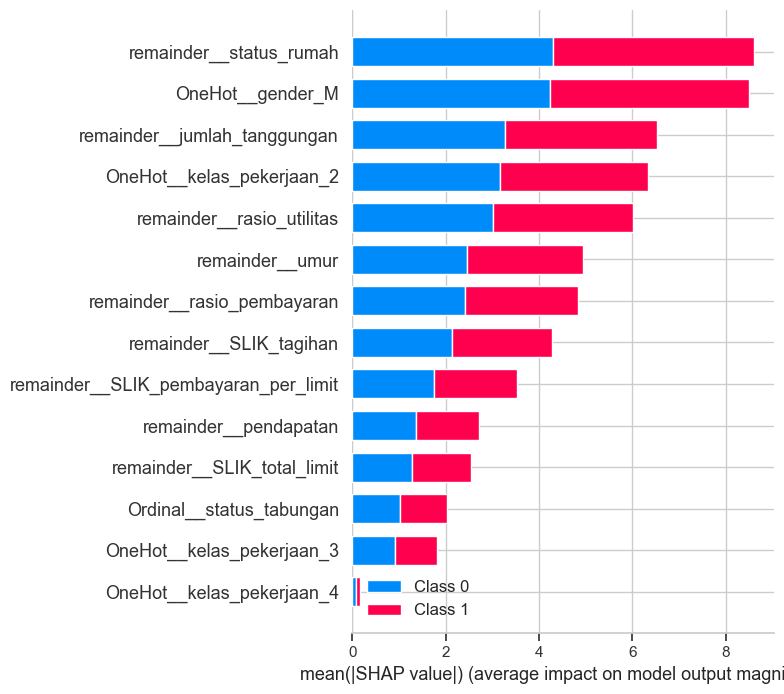

In [90]:
import shap
import numpy.core.multiarray

shap.initjs()

explainer = shap.TreeExplainer(lgbm_deploy)
shap_values = explainer.shap_values(X_train)

# Rangkuman hasil analisa dari semua variabel
shap.summary_plot(shap_values, X_train, feature_names = column_names_X)

Hasil interpretasi data pemodelan LightGBM setelah dilakukan hyperparameter tunning diperoleh SHAP Values seperti gambar diatas. Warna biru menunjukkan kelas yang diidentifikasi sebagai kelas tidak gagal bayar, sedangakan warna merah sebagai kelas yang gagal bayar. Dari hasil diatas terlihat bahwa kelas yang diidentifikasi sebagai kelas gagal bayar secara umum memiliki perolehan nilai SHAP Values hampir sama dengan kelas yang diidentifikasi sebagai kelas tidak gagal bayar artinya, model mampu mengidentifikasi secara berimbang kelas yang diidentifikasi sebagai kelas gagal bayar dan tidak gagal bayar. Dari grafik diatas terlihat bahwa, **status rumah, gender male, kelas pekerjaan, jumlah tanggungan, dan rasio pembayaran** menempati top 5 yang berpengaruh terhadap hasil prediksi. 